## Importing and initializing the data points

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [6]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=550, centers=4, cluster_std=0.60, random_state=0)

In [7]:
import plotly.express as px
fig = px.scatter(x =X[:, 0], y =X[:, 1],width=800,height=500)
fig.show()

## Elbow Method to find optimal K

In [8]:
cost =[]
for i in range(1, 11):
	KM = KMeans(n_clusters = i, max_iter = 500)
	KM.fit(X)
	
	cost.append(KM.inertia_)	

# plot the cost against K values
fig = px.line(x=range(1, 11), y=cost, width=600, height=400)
fig.show()
# the point of the elbow is the
# most optimal value for choosing k


## Defining Model and fitting the same


In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [10]:
fig = px.scatter(x =X[:, 0], y = X[:, 1], color=y_kmeans, width=700,height=400)
trace = px.scatter(x =X[:, 0], y = X[:, 1],  width=700,height=400)
fig.show()

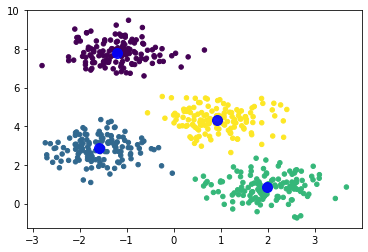

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

# Iris Dataset

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [24]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df['class']=iris.target
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [52]:
px.histogram(df, x ='class', color='class')

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,0:4].values

In [63]:
scaled_x = scaler.fit_transform(X)

In [74]:
model = KMeans(n_clusters=3,init='k-means++',random_state=0)
labels = model.fit_predict(scaled_x)

In [81]:
import plotly.graph_objects as go
fig = go.Figure()

 # Add trace
fig.add_trace(go.Histogram(x=labels,name="Predicted Labels"))
fig.add_trace(go.Histogram(x=df['class'],name="True Labels"))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [89]:
labels =[]
for i in range(2, 5):
	model = KMeans(n_clusters = i, max_iter = 500)
	model.fit(scaled_x)
	labels.append(model.fit_predict(scaled_x))	


In [97]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=2)
for i in range(0, 3):
    fig.add_trace(go.Histogram(x=labels[i],name="{} Clusters".format(i+2)),
              row=(i//2 + 1), col=(i%2 + 1))
fig.add_trace(go.Histogram(x=df['class'],name="True Classification"),
              row=(2), col=(2))
fig.update_layout(height=700, width=1000, title_text="Side By Side Subplots")

fig.show()